In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('LoanData.csv') 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
**Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data['Loan_ID'].nunique()

614

In [6]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [7]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [9]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [11]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [13]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [15]:
data['Income'] = data['ApplicantIncome']+ data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome' ,'CoapplicantIncome'],inplace = True)

In [ ]:
**Drop unimportant columns as per feature selections

In [16]:
data.drop(columns=['Loan_ID'],inplace = True)
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [17]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [18]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [20]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [21]:
data['Credit_History'] = data['Credit_History'].replace({1:'good',0:'bad'})

In [22]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [23]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [24]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [26]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [28]:
continous = [ 'Income'  , 'LoanAmount' ]
discrete_categorical = [ 'Gender', 'Married','Education',
       'Self_Employed',
        'Credit_History', 'Property_Area', 'Loan_Status'] 

discrete_count = ['Dependents' , 'Loan_Amount_Term',   ]  

In [29]:
data.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

In [30]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


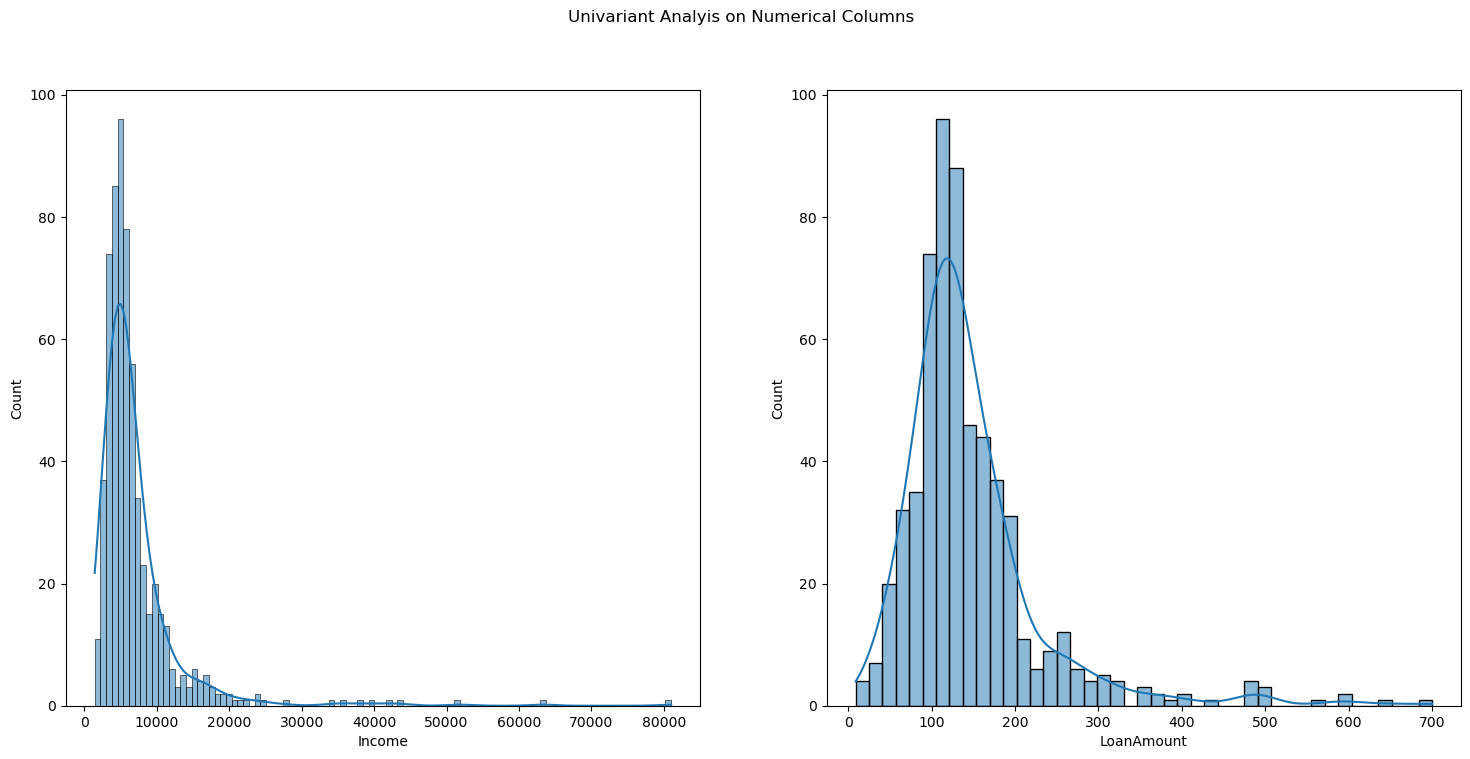

In [31]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(data['Income'],kde = True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde = True)

plt.suptitle('Univariant Analyis on Numerical Columns')
plt.show()
             

In [32]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

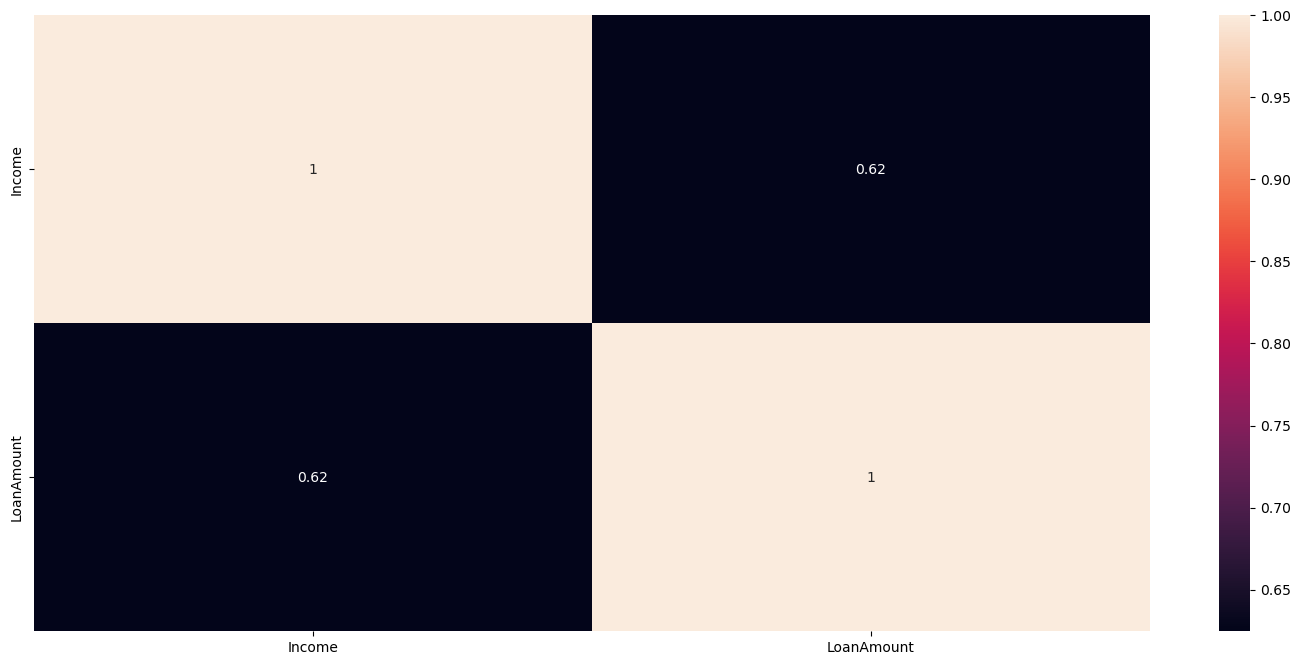

In [33]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

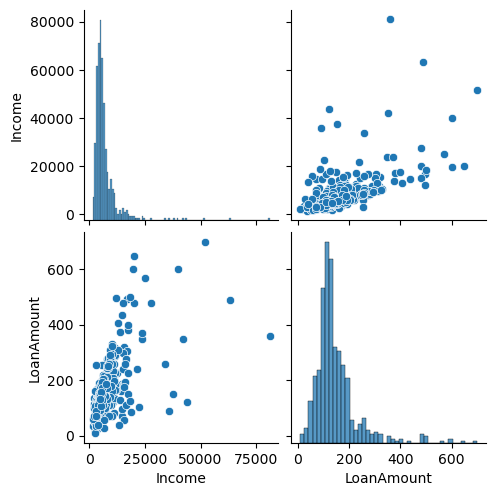

In [34]:
sns.pairplot(data[continous])
plt.show()

In [35]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


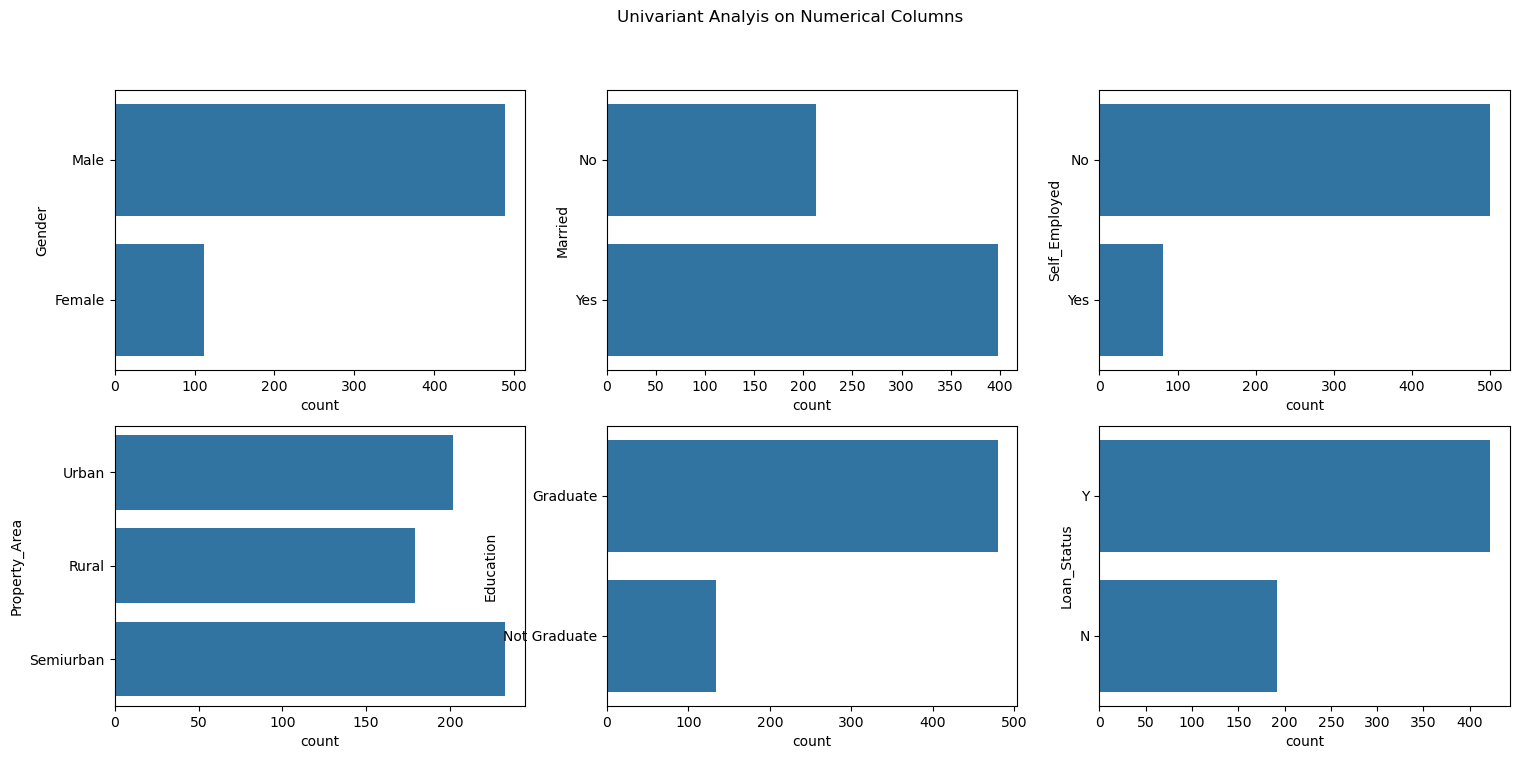

In [36]:
plt.rcParams['figure.figsize'] = (18,8)
plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle ('Univariant Analyis on Numerical Columns')
plt.show()

In [37]:
# Lets compare all the Categories with respect to the Loan Status to understand 
      
print("Impact of Marraige on Loan Status")
print(pd.crosstab(data['Loan_Status'], data[ 'Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')
      
print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print(' \n')
      
print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')
      
print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))
print("\n")     
      
print("Impact of Property on Loan Status ")     
print(pd.crosstab(data['Loan_Status'], data['Credit_History']))
print("\n")    

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140 

**Check for missing values

In [38]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**check for skewness

In [39]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**check outliers

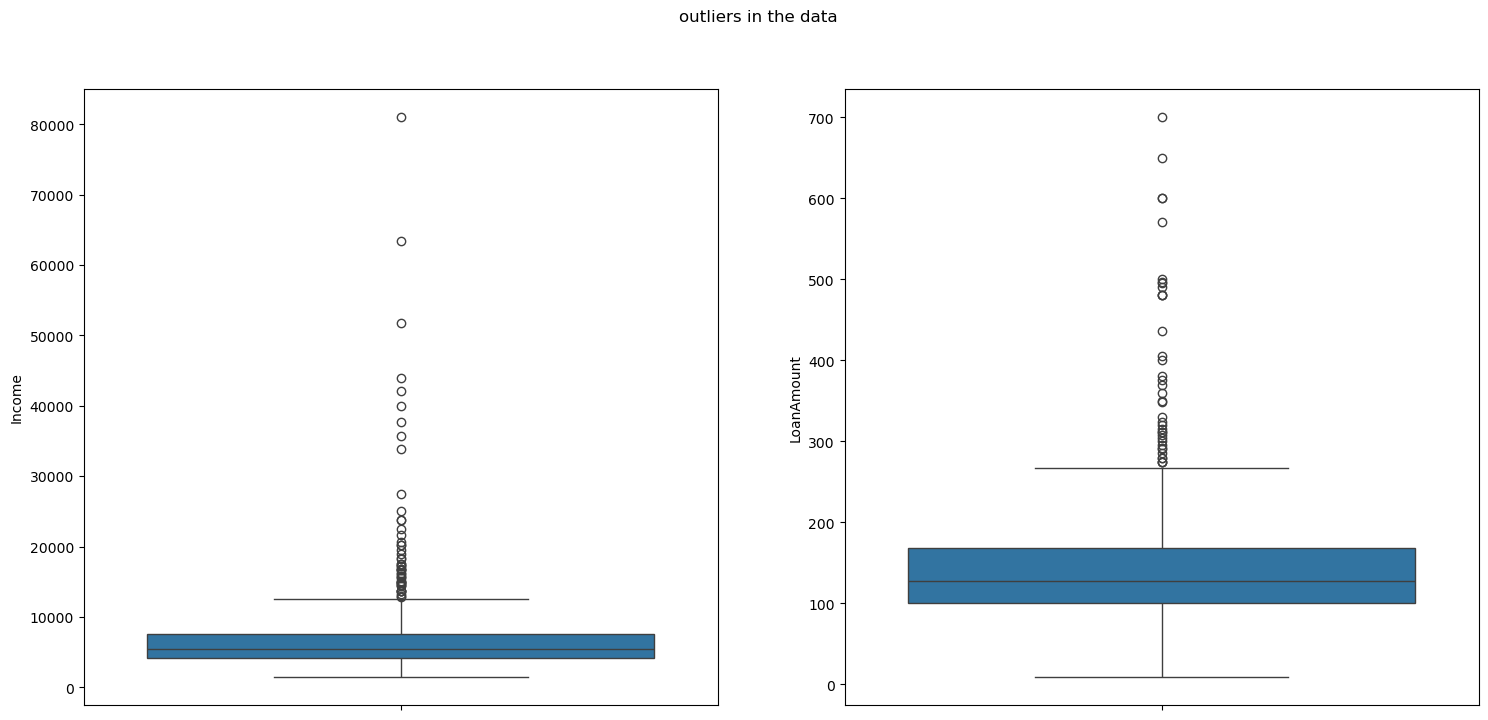

In [40]:
#let visualize the outliers using boxplot

plt.subplot(1,2,1)
sns.boxplot(data['Income'])


plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('outliers in the data')
plt.show()

**3-Data Preprocessing

 1-Data cleaning
 -wrong data
 -missing values
 -wrong data types 
 -duplicates
 -outliers
 
 2-Data wrangling
  -transformation ('applicable on continous')
  -scaling        ('applicable on continous')
  -encoding       ('applicable on discrete categorical')
  
**dont apply data wrangling on discrete count

**Wrong data treatment

In [41]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

**Missing Values Treatment

In [42]:
data['Dependents'] = data[ 'Dependents'].fillna(0)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode() [0])
data['Married'] = data['Married'].fillna(data[ 'Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data = data.dropna(subset=["Income", 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

**data type conversion

In [43]:
data[ 'Dependents'] = data[ 'Dependents'] .astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

**outliers treatment

In [ ]:
 #outliers should be retrained (because really some people will have high income)

**Encoding

In [44]:
data[ 'Gender'] = data['Gender'].replace({ 'Male':1, 'Female' :0})
data[ 'Married'] = data[ 'Married'].replace({'Yes':1, 'No' :0})
data['Education'] = data[ 'Education'].replace({ 'Graduate':1, 'Not Graduate' :0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1, 'No' :0})
data['Property_Area'] = data[ 'Property_Area'].replace({'Rural':0, 'Semiurban' :1, 'Urban' : 2})
data[ 'Credit_History'] = data['Credit_History'].replace({'good':1, 'bad':0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1, 'N':0})

**transformations

In [45]:
from scipy.stats import boxcox
data[ 'Income'],a = boxcox(data['Income' ])
data['LoanAmount'],c = boxcox(data[ 'LoanAmount' ])

In [46]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

In [47]:
X= data.drop('Loan_Status' ,axis=1)
y = data['Loan_Status']

**train-test-split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =7)

**Stage -4: Modelling & Evaluation

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

**Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train) #default threshould value is 0.5
print('Train Accuracy :',accuracy_score(y_train,ypred_train))

print('CV score :',cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())

ypred_test = log_model.predict(X_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8085106382978723
CV score : 0.8060504201680672
Test Accuracy: 0.839622641509434


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[14 16]
 [ 1 75]]
              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.82      0.99      0.90        76

    accuracy                           0.84       106
   macro avg       0.88      0.73      0.76       106
weighted avg       0.86      0.84      0.82       106



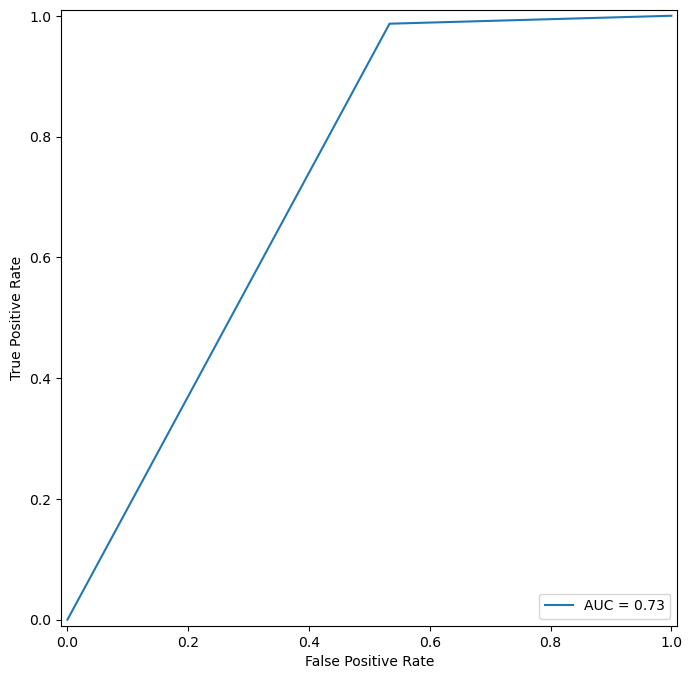

In [52]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt. show()

In [53]:
#AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:", roc_auc_score(y_test,ypred_test))

AUC Score: 0.7267543859649123


**KNN

-HPT -Modelling & Evaluation

In [60]:
#hyperparameter tuning 

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,45)),"p":[1,2]}
knn_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

#KNN with best parameters
knn_grid.best_estimator_

KNeighborsClassifier(p=1)

In [58]:
#ModeLinng
knn_model = knn_grid.best_estimator_
knn_model. fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = knn_model.predict(X_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score:", cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data ypred test
ypred_test = knn_model.predict(X_test)
print ("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8014184397163121
CV Score: 0.7492997198879552
Test Accuracy : 0.7264150943396226


In [ ]:
**Support Vector Machine (SVM)

-HPT -Modelling & Evaluation

In [61]:
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear', 'rbf', 'sigmoid', 'poly']}
svm_grid = GridSearchCV(estimator, param_grid,scoring='accuracy', cv=5)
svm_grid.fit(X_train,y_train)
#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [62]:
#ModeLinng
svm_model = svm_grid.best_estimator_
svm_model. fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = svm_model.predict(X_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score:", cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data ypred test
ypred_test = svm_model.predict(X_test)
print ("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8085106382978723
CV Score: 0.8084313725490195
Test Accuracy : 0.839622641509434


**Decision Tree Classifier

-HPT -Identify important features by using feature selection (ensemble method) -Modelling & Evaluation

In [63]:
model = DecisionTreeClassifier (random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

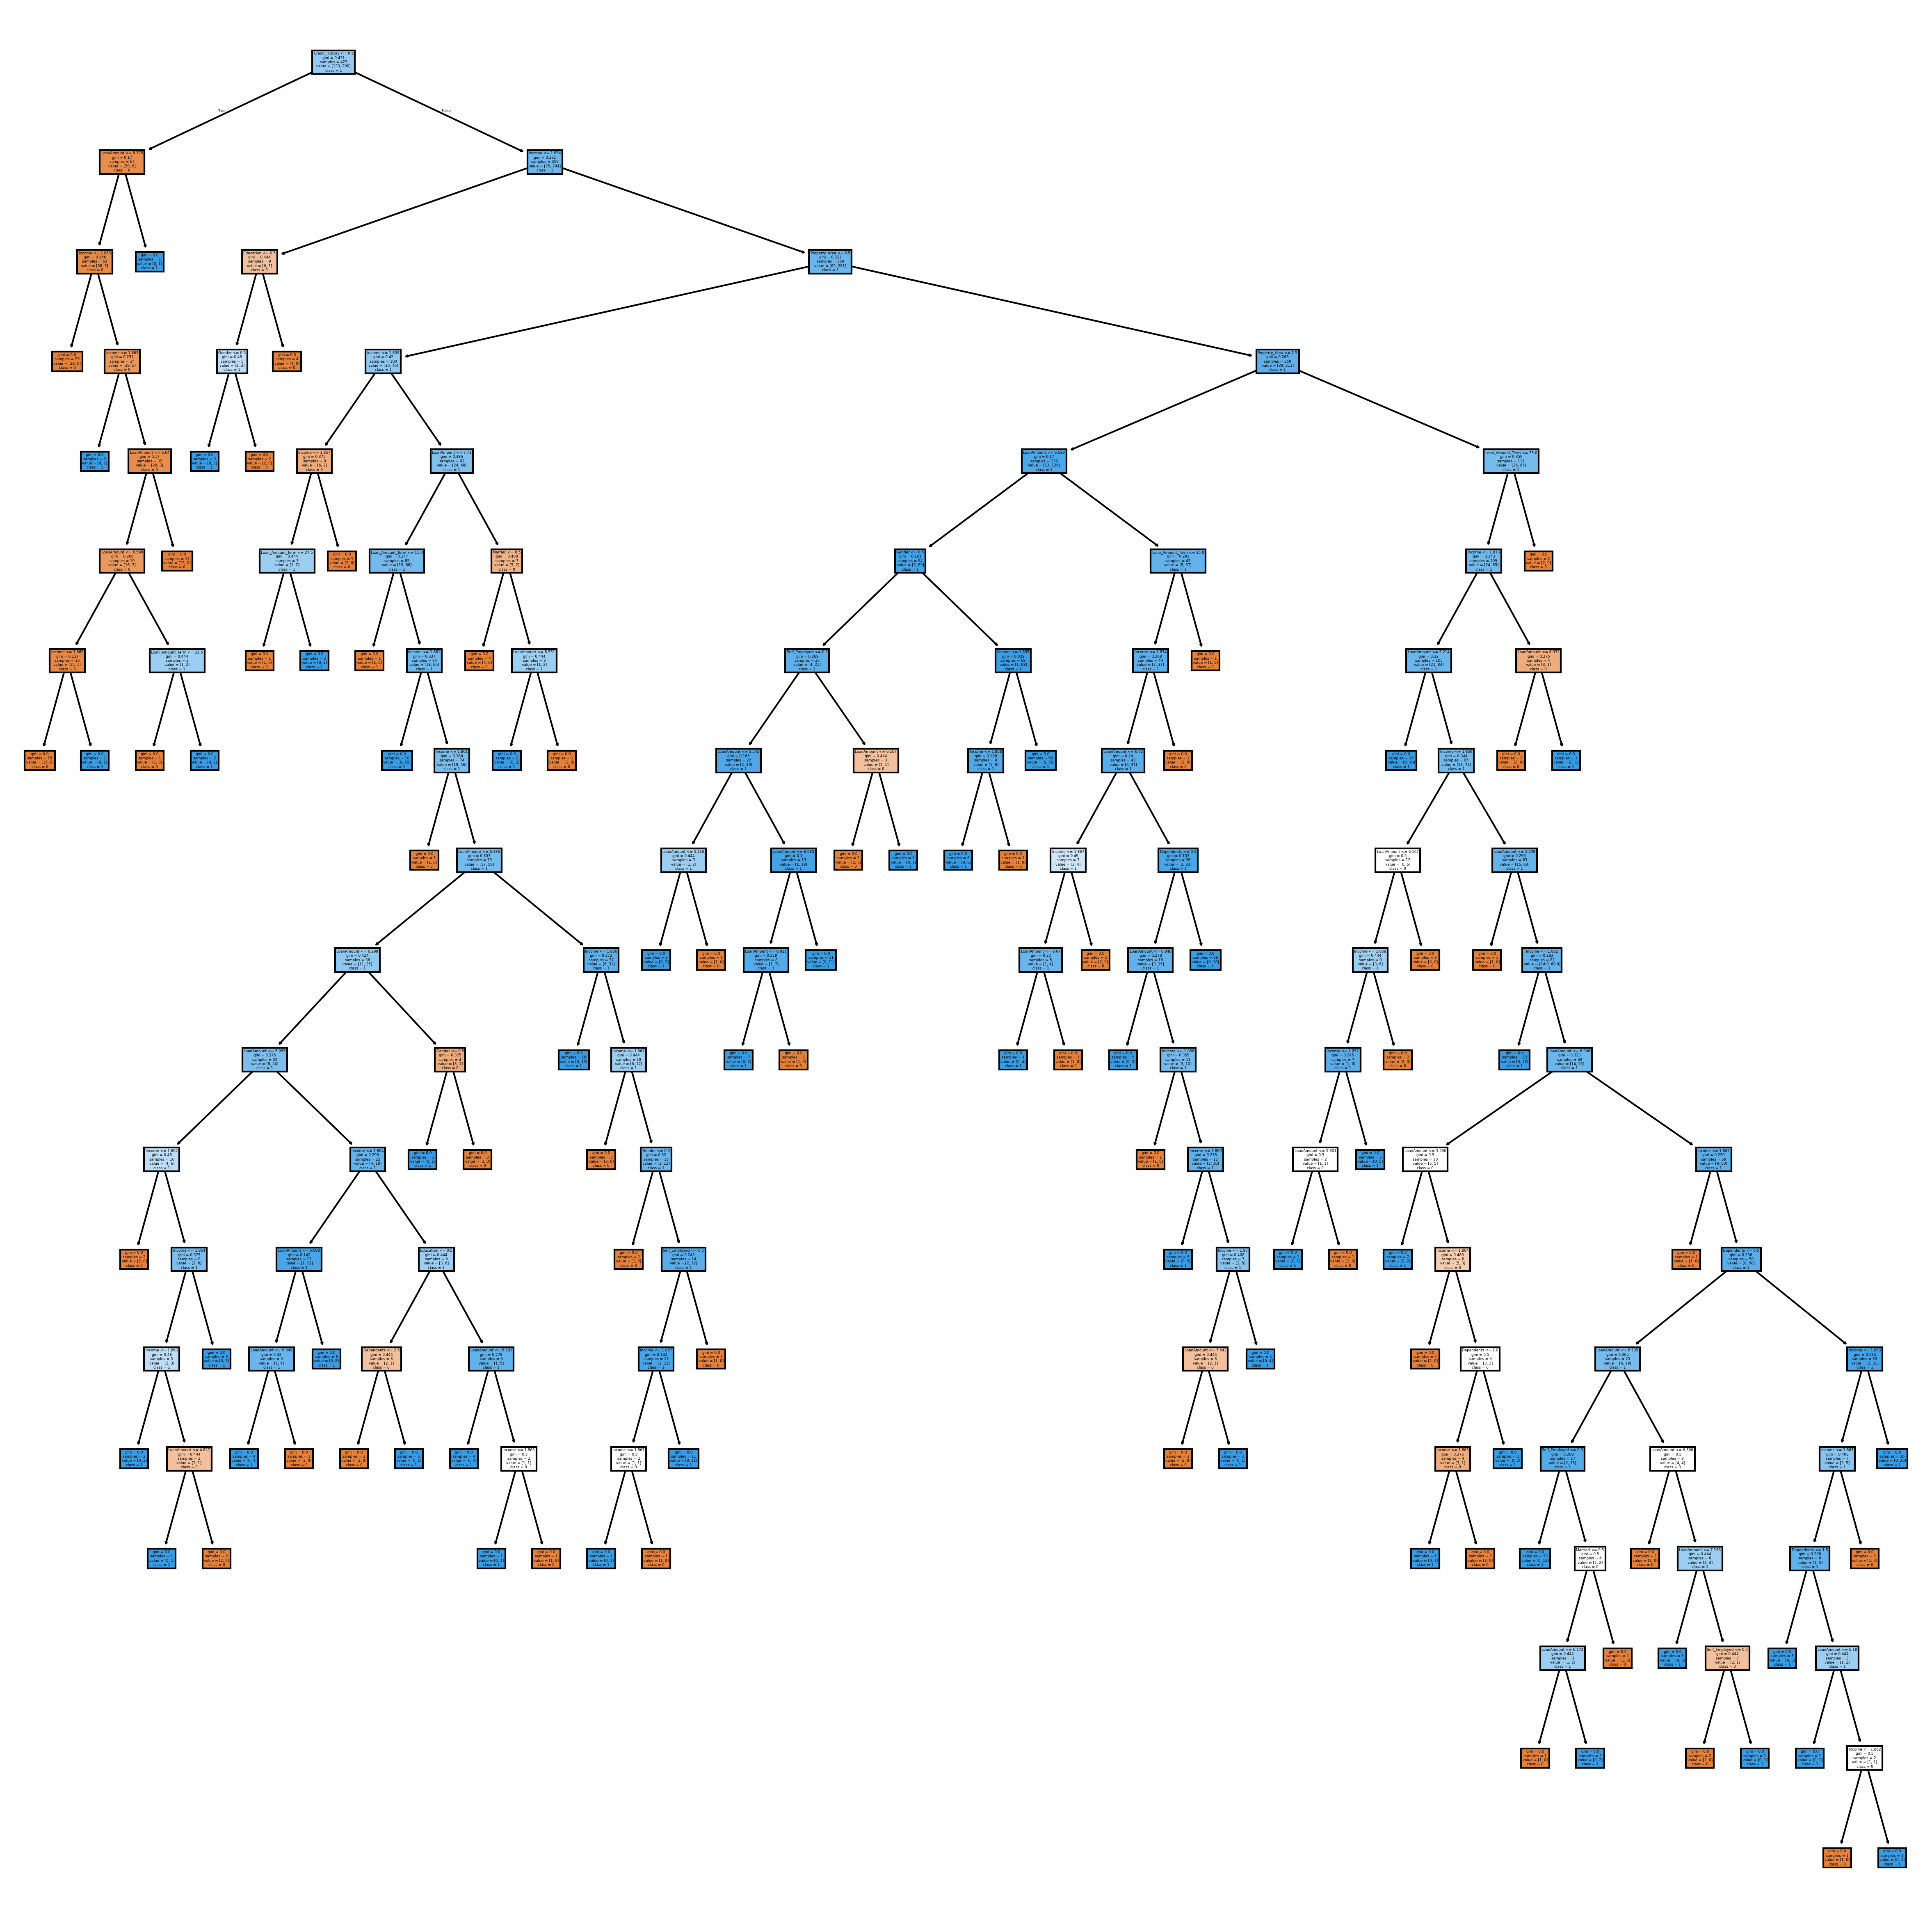

In [64]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model, filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=["0","1"])
plt.show()

In [65]:
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {"criterion": ["gini", "entropy"],
             "max_depth": list(range (1,16) )}
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid. fit(X_train,y_train)
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [66]:
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                  index=X.columns, 
                columns=[ 'Importance'])
important_features_dt = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

In [67]:
#Creating Decison Tree Model with important parameters and important features

#Selecting train & test data

X_train_dt = X_train[important_features_dt]
X_test_dt = X_test [important_features_dt]

#ModeLLing

dt = dt_grid.best_estimator_
dt. fit(X_train_dt,y_train)
#evaLuatzon
ypred_train = dt.predict(X_train_dt)
ypred_test= dt.predict(X_test_dt)
print ("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score :", cross_val_score(dt,X_train_dt,y_train,cv=5, scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8085106382978723
CV Score : 0.8084313725490195
Test Accuracy : 0.839622641509434


**Random Forest Classifier

-HPT
-identify important features
-Modelling
-Evaluation

In [69]:
estimator = RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)
rf= rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=43, random_state=True)

In [70]:
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [71]:
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]
#ModelLing
rf= rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test= rf.predict(X_test_rf)
print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV score:", cross_val_score(rf, X_train_rf, y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9976359338061466
CV score: 0.8037535014005602
Test Accuracy : 0.839622641509434


In [ ]:
**Gradient Boost Classifier

In [72]:
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators": list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=9, random_state=True)

In [73]:
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                     index=X.columns, 
                     columns=['Importance'])
important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['Gender',
 'Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [74]:
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)
ypred_train = gb.predict(X_train_gb)
ypred_test  = gb.predict(X_test_gb)
print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score:", cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print ("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.817966903073286
CV Score: 0.7989915966386555
Test Accuracy : 0.839622641509434


In [ ]:
**AdaBoost Classifier

In [75]:
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
ab_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)
ab= ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=7, random_state=True)

In [76]:
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                     index=X.columns, 
                     columns=['Importance'])
important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [77]:
X_train_ab = X_train[important_features_gb]
X_test_ab = X_test[important_features_gb]
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)
ypred_train = ab.predict(X_train_ab)
ypred_test  = ab.predict(X_test_ab)
print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score:", cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print ("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.817966903073286
CV Score: 0.8155742296918767
Test Accuracy : 0.8301886792452831


In [ ]:
**Sava the Model 

In [79]:
from joblib import dump

dump(dt,'loan.joblib')

['loan.joblib']

In [ ]:
**Predict on NewData

In [80]:
input_data = {'Loan_ID':'LP002991', 'Gender':'Male', 
              'Married':'No', 'Dependents':1, 'Education':'Graduate',
       'Self_Employed':'yes','ApplicantIncome':1000, 'CoapplicantIncome':0, 'LoanAmount':100,
       'Loan_Amount_Term':240, 'Credit_History':'bad', 'Property_Area':'Urban'}

In [81]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


In [ ]:
**Apply Data Preprocessing on Unknown Data

In [83]:
data.drop(columns=["Loan_ID"], inplace=True)
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
data['Dependents'] = data['Dependents']. fillna(0)
data['Gender'] = data['Gender']. fillna(data[ 'Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data[ 'Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed']. fillna(data['Self_Employed']. mode()[0])
data = data.dropna(subset=["Income", 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
data['Dependents'] = data[ 'Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')
data['Gender'] = data['Gender']. replace({'Male':1, 'Female' :0})
data['Married'] = data['Married'].replace({'Yes':1, 'No' :0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good' :1, 'bad' :0})
data['Loan_Amount_Term'] = data['Loan_Amount_Term' ]/12
X_new = data


In [84]:
# Select Important features of your best model
X_new = X_new[important_features_dt]

# Apply & Predict using your best model
dt.predict(X_new)

array([0], dtype=int64)